# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/Vaidehee/Desktop/nu-chi-data-pt-02-2021-u-c-master 3/02-Homework/06-Python-APIs/Instructions/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Creating Url
url = "http://api.openweathermap.org/data/2.5/weather?"
temp_units = "imperial"

# Build test URL
test_url = f"{url}appid={weather_api_key}&units={temp_units}&q="

lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lng = []
date = []
country = []
cloudiness = []
city_id = []



# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("--------------------------------------------")
count = 0
set = 1
for index, city in enumerate(cities):
    count = count + 1
    
    if count == 50:
        count = 1
        set = set + 1
        
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(test_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
        
    except Exception:
        print("City not found. Skipping...")

        
print("------------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------------")

Beginning Data Retrieval
--------------------------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | kudahuvadhoo
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 6 of Set 1 | miri
Processing Record 7 of Set 1 | bengkulu
Processing Record 8 of Set 1 | ossora
Processing Record 9 of Set 1 | chuy
Processing Record 10 of Set 1 | toliary
City not found. Skipping...
Processing Record 11 of Set 1 | manpur
Processing Record 12 of Set 1 | xining
Processing Record 13 of Set 1 | gat
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | lompoc
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | sao filipe
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | isang

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
#lists
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lng = []
date = []
country = []
cloudiness = []
city_id = []

#create DF

cities_df = pd.DataFrame({
    'City': city_id,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': temp_max,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
})

# Convert to DataFrame
weather_city_df = pd.DataFrame(cities_df)

In [16]:
# Export the city data into a .csv file.
weather_city_df.to_csv("/Users/Vaidehee/Desktop/nu-chi-data-pt-02-2021-u-c-master 3/02-Homework/06-Python-APIs/Instructions/output_data/city_weather_data.csv", index=False)

# Display the DataFrame
weather_city_df = pd.read_csv("/Users/Vaidehee/Desktop/nu-chi-data-pt-02-2021-u-c-master 3/02-Homework/06-Python-APIs/Instructions/output_data/city_weather_data.csv")

weather_city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#in the example provided, no cities have a humidity of over a 100% so this step was skipped. 

In [17]:
#  Get the indices of cities that have humidity over 100%.
#in the example provided, no cities have a humidity of over a 100% so this step was skipped. 

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [ ]:
#in the example provided, no cities have a humidity of over a 100% so this step was skipped. 


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

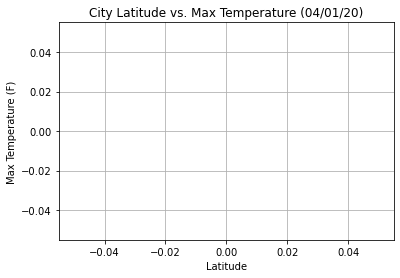

<Figure size 432x288 with 0 Axes>

In [62]:

#format plot
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker = "o", s=35, edgecolors= 'black')


plt.show()
plt.savefig("/Users/Vaidehee/Desktop/nu-chi-data-pt-02-2021-u-c-master 3/02-Homework/06-Python-APIs/Instructions/output_data/latvstemp.png")


#data isn't displaying

## Latitude vs. Humidity Plot

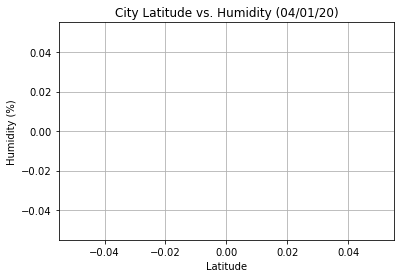

<Figure size 432x288 with 0 Axes>

In [20]:
#format plot
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.scatter(weather_city_df['Lat'], weather_city_df['Humidity'], marker = "o", s=35, edgecolors= 'black')


plt.show()
plt.savefig("/Users/Vaidehee/Desktop/nu-chi-data-pt-02-2021-u-c-master 3/02-Homework/06-Python-APIs/Instructions/output_data/latvshumidity.png")


#data isn't displaying

## Latitude vs. Cloudiness Plot

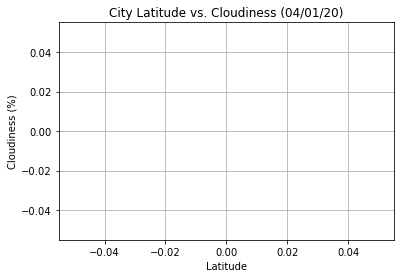

<Figure size 432x288 with 0 Axes>

In [19]:
#format plot
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.scatter(weather_city_df['Lat'], weather_city_df['Cloudiness'], marker = "o", s=35, edgecolors= 'black')


plt.show()
plt.savefig("/Users/Vaidehee/Desktop/nu-chi-data-pt-02-2021-u-c-master 3/02-Homework/06-Python-APIs/Instructions/output_data/latvscloudiness.png")


#data isn't displaying

## Latitude vs. Wind Speed Plot

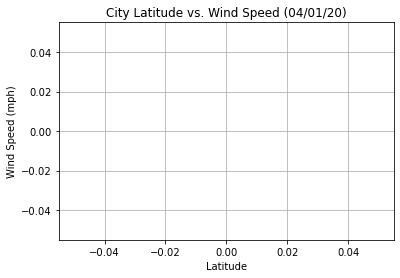

<Figure size 432x288 with 0 Axes>

In [17]:
#format plot
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.scatter(weather_city_df['Lat'], weather_city_df['Wind Speed'], marker = "o", s=35, edgecolors= 'black')


plt.show()
plt.savefig("/Users/Vaidehee/Desktop/nu-chi-data-pt-02-2021-u-c-master 3/02-Homework/06-Python-APIs/Instructions/output_data/latvswindspeed.png")


#data isn't displaying

## Linear Regression

In [26]:
northern_hemi= weather_city_df.loc[weather_city_df['Lat']>=0]
southern_hemi= weather_city_df.loc[weather_city_df['Lat']<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

ValueError: Inputs must not be empty.

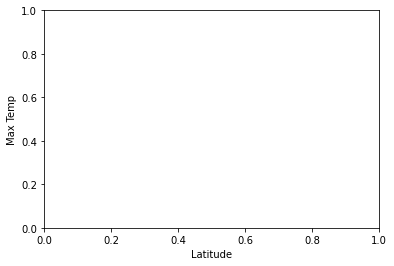

In [31]:
#plt labels
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
#axis data
x_axis = northern_hemi['Lat']
y_axis = northern_hemi['Max Temp']

#use lib to calculate values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
fit = slope + x_axis + intercept
#print r value
print(f"The r-value is : {rvalue}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, fit, color = 'r')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

ValueError: Inputs must not be empty.

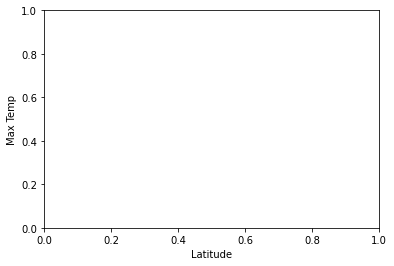

In [32]:
#plt labels
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
#axis data
x_axis = southern_hemi['Lat']
y_axis = southern_hemi['Max Temp']

#use lib to calculate values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
fit = slope + x_axis + intercept
#print r value
print(f"The r-value is : {rvalue}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, fit, color = 'r')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

ValueError: Inputs must not be empty.

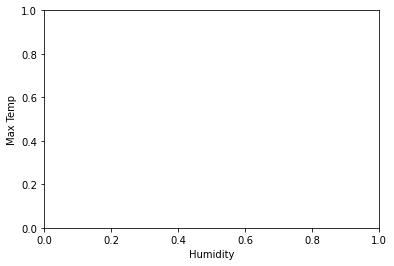

In [33]:
#plt labels
plt.ylabel("Max Temp")
plt.xlabel("Humidity")
#axis data
x_axis = northern_hemi['Lat']
y_axis = northern_hemi['Humidity']

#use lib to calculate values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
fit = slope + x_axis + intercept
#print r value
print(f"The r-value is : {rvalue}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, fit, color = 'r')



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

ValueError: Inputs must not be empty.

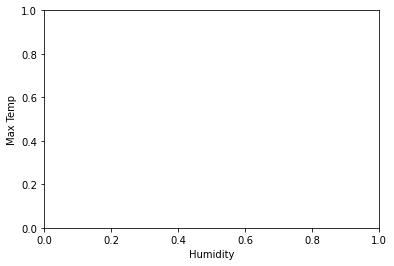

In [34]:
#plt labels
plt.ylabel("Max Temp")
plt.xlabel("Humidity")
#axis data
x_axis = southern_hemi['Lat']
y_axis = southern_hemi['Humidity']

#use lib to calculate values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
fit = slope + x_axis + intercept
#print r value
print(f"The r-value is : {rvalue}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, fit, color = 'r')




####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


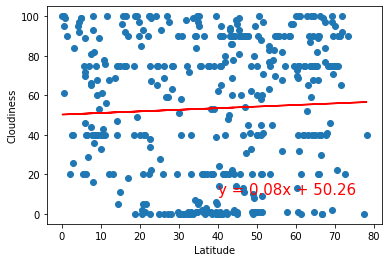

In [29]:
#plt labels
plt.ylabel("Max Temp")
plt.xlabel("Cloudiness")
#axis data
x_axis = northern_hemi['Lat']
y_axis = northern_hemi['Cloudiness']

#use lib to calculate values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
fit = slope + x_axis + intercept
#print r value
print(f"The r-value is : {rvalue}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, fit, color = 'r')




####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

ValueError: Inputs must not be empty.

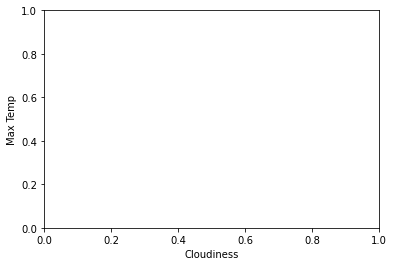

In [35]:
#plt labels
plt.ylabel("Max Temp")
plt.xlabel("Cloudiness")
#axis data
x_axis = southern_hemi['Lat']
y_axis = southern_hemi['Cloudiness']

#use lib to calculate values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
fit = slope + x_axis + intercept
#print r value
print(f"The r-value is : {rvalue}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, fit, color = 'r')




####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

ValueError: Inputs must not be empty.

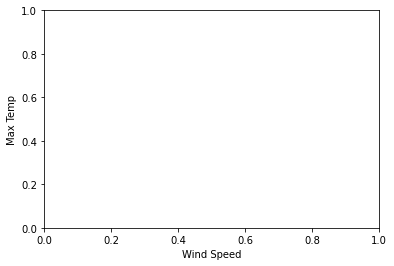

In [36]:
#plt labels
plt.ylabel("Max Temp")
plt.xlabel("Wind Speed")
#axis data
x_axis = northern_hemi['Lat']
y_axis = northern_hemi['Wind Speed']

#use lib to calculate values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
fit = slope + x_axis + intercept
#print r value
print(f"The r-value is : {rvalue}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, fit, color = 'r')




####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

ValueError: Inputs must not be empty.

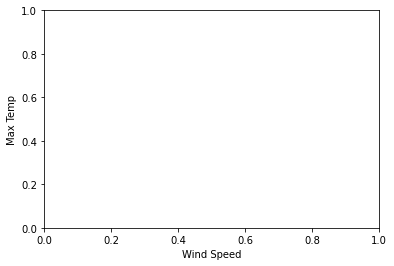

In [37]:
#plt labels
plt.ylabel("Max Temp")
plt.xlabel("Wind Speed")
#axis data
x_axis = southern_hemi['Lat']
y_axis = southern_hemi['Wind Speed']

#use lib to calculate values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
fit = slope + x_axis + intercept
#print r value
print(f"The r-value is : {rvalue}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, fit, color = 'r')


